In [1]:
#GET DEPENDENCIES
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.3 MB/s eta 0:00:00


In [2]:
#MOUNT DRIVE FOR REF FILES
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load BASE PROTGPT2 MODEL
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AutoModelForCausalLM, AutoTokenizer, pipeline
import torch
import math

model = GPT2LMHeadModel.from_pretrained('nferruz/ProtGPT2')
tokenizer = GPT2Tokenizer.from_pretrained('nferruz/ProtGPT2')
protgpt2 = pipeline('text-generation', model=model, tokenizer=tokenizer,device=0)

In [4]:
#load FINETUNED PROTGPT2 MODEL
# replace with path to result1 in your drive
model_path_fine_tuned = '/content/drive/MyDrive/Colabs/result1'
tokenizer_fine_tuned = AutoTokenizer.from_pretrained(model_path_fine_tuned)
model_fine_tuned = AutoModelForCausalLM.from_pretrained(model_path_fine_tuned)

In [5]:
# Create text-generation pipeline w fine-tuned model/tokenizer

# uncomment this line, with "device=0" if using GPU runtime
protgpt2_fine_tuned = pipeline('text-generation', model=model_fine_tuned, tokenizer=tokenizer_fine_tuned, device=0)

# uncomment this line if not using GPU runtime
#protgpt2_fine_tuned = pipeline('text-generation', model=model_fine_tuned, tokenizer=tokenizer_fine_tuned) # no gpu

def calculatePerplexity(sequence, model, tokenizer):
    input_ids = torch.tensor(tokenizer.encode(sequence)).unsqueeze(0)
    input_ids = input_ids.to(model.device)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
    loss, logits = outputs[:2]
    return math.exp(loss)

In [6]:
#sample nanobody sequence as input
inp = "QVQLQESGGGSVQAGGSLKLSCAASGRSFSTYAMGWFRQAPGQDREFVATISWTDSTDYADSVKGRFTISRDNAKNTGYLQMNSLKPEDTAVYYCAADRWASSRRNVDYDYWGQGTQVTVSSHGSGLVPR"

In [7]:
i=0
with open("/content/drive/My Drive/input/ft_seq.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 40: #generate 1000 seq in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp, min_length=105, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token

In [8]:
i=0
with open("/content/drive/My Drive/input/base_seq.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 40: #generate 1000 seq in batches of 25, due to RAM limitations
      sequences = protgpt2(inp, min_length=105, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token

In [64]:
#calculate perplexity on fine-tuned samples
perplexity_list_ft = []
fp = "/content/drive/My Drive/input/ft_seq.txt"
with open(fp, 'r') as file:
    for seq in file:
      perplexity_list_ft.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))

In [11]:
print(sum(perplexity_list_ft)/1000)

227.54893568685654


In [10]:
#calculate perplexity on base samples
perplexity_list_base = []
fp = "/content/drive/My Drive/input/base_seq.txt"
with open(fp, 'r') as file:
    for seq in file:
      perplexity_list_base.append(calculatePerplexity(seq, model, tokenizer))

In [12]:
print(sum(perplexity_list_base)/1000)

891.9308480820217


In [15]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install matplotlib

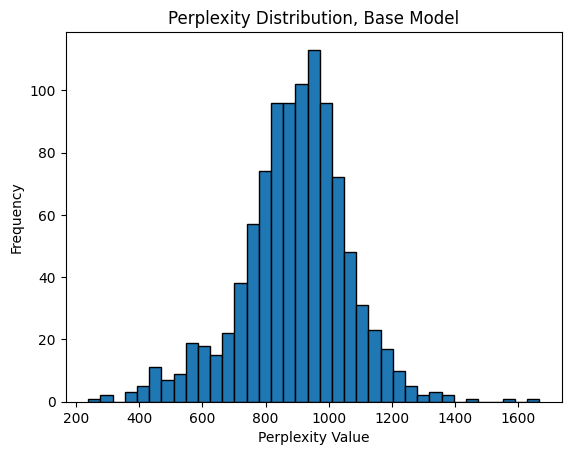

In [18]:
import matplotlib.pyplot as plt
plt.hist(perplexity_list_base, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Base Model')
plt.show()


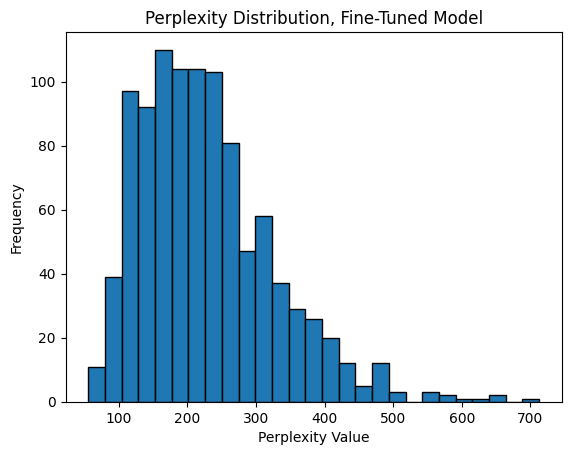

In [19]:
plt.hist(perplexity_list_ft, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Fine-Tuned Model')
plt.show()

In [23]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_rel(perplexity_list_base, perplexity_list_ft)
print("t-statistic: {:.6f}".format(t_stat))
print("p-value: {:.12f}".format(p_value))

t-statistic: 105.340422
p-value: 0.000000000000


In [24]:
inp = "MAFTVTVPKDLYVVEYGSNMTIECKFPVEKQLDLAALIVYWEMEDKNIIQFVHGEEDLKVQHSSYRQRARLLKDQLSLGNAALQITDVKLQDAGVYRCMISYGGADYKRITVKVNALEHHHHHH"
i=0
with open("/content/drive/My Drive/input/base_seq_2.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 40: #generate 1000 seq in batches of 25, due to RAM limitations
      sequences = protgpt2(inp, min_length=105, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1
i=0
with open("/content/drive/My Drive/input/ft_seq_2.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 40: #generate 1000 seq in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp, min_length=105, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token

In [25]:
inp = "QVQLQESGGGSVQAGGSLKLTCAASGYIFNSCGMGWYRQSPGRERELVSRISGDGDTWHKESVKGRFTISQDNVKKTLYLQMNSLKPEDTAVYFCAVCYNLETYWGQGTQVTVSS"
i=0
with open("/content/drive/My Drive/input/base_seq_3.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 40: #generate 1000 seq in batches of 25, due to RAM limitations
      sequences = protgpt2(inp, min_length=105, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1
i=0
with open("/content/drive/My Drive/input/ft_seq_3.txt", "w") as file:
    # Iterate through the list and write each string to the file
    while i < 40: #generate 1000 seq in batches of 25, due to RAM limitations
      sequences = protgpt2_fine_tuned(inp, min_length=105, max_length=200, do_sample=True, top_k=950, repetition_penalty=1.2, num_return_sequences=25, eos_token_id=0)
      for seq in sequences:
        write_seq = seq['generated_text']
        write_seq = write_seq.replace("\n","")
        file.write(write_seq + "\n")
      i+=1

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for o

In [58]:
perplexity_list_ft_2 = []
fp = "/content/drive/My Drive/input/ft_seq_2.txt"
with open(fp, 'r') as file:
    for seq in file:
      perplexity_list_ft_2.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))

print(sum(perplexity_list_ft_2)/1000)

1956.55921898377


In [28]:
perplexity_list_base_2 = []
fp = "/content/drive/My Drive/input/base_seq_2.txt"
with open(fp, 'r') as file:
    for seq in file:
      perplexity_list_base_2.append(calculatePerplexity(seq, model, tokenizer))

print(sum(perplexity_list_base_2)/1000)

2179.196525557431


In [62]:
perplexity_list_ft_3 = []
fp = "/content/drive/My Drive/input/ft_seq_3.txt"
with open(fp, 'r') as file:
    for seq in file:
      perplexity_list_ft_3.append(calculatePerplexity(seq, model_fine_tuned, tokenizer_fine_tuned))

print(sum(perplexity_list_ft_3)/1000)

371.0913974102988


In [30]:
perplexity_list_base_3 = []
fp = "/content/drive/My Drive/input/base_seq_3.txt"
with open(fp, 'r') as file:
    for seq in file:
      perplexity_list_base_3.append(calculatePerplexity(seq, model, tokenizer))

print(sum(perplexity_list_base_3)/1000)

1211.2167551274647


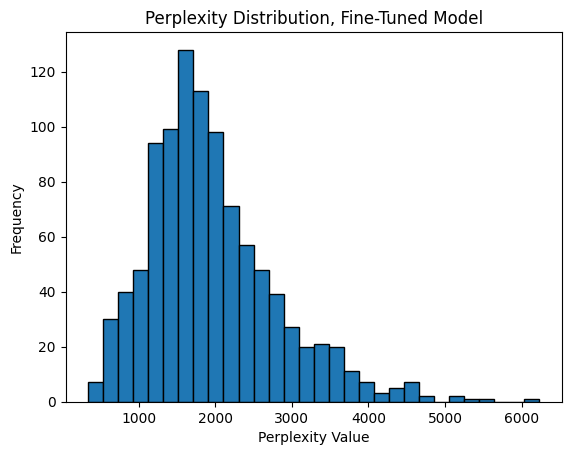

In [31]:
plt.hist(perplexity_list_ft_2, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Fine-Tuned Model')
plt.show()

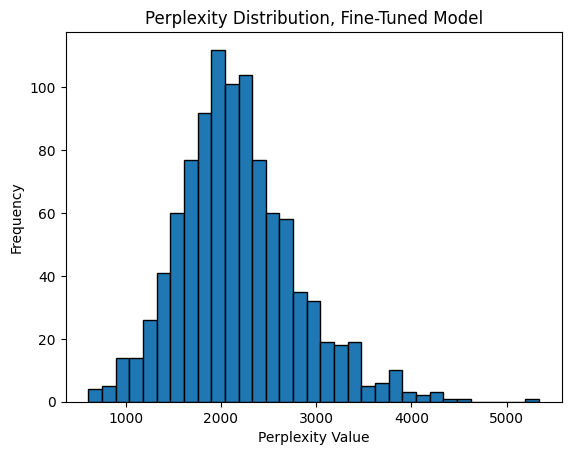

In [32]:
plt.hist(perplexity_list_base_2, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Fine-Tuned Model')
plt.show()

In [33]:
t_stat, p_value = stats.ttest_rel(perplexity_list_base_2, perplexity_list_ft_2)
print("t-statistic: {:.6f}".format(t_stat))
print("p-value: {:.12f}".format(p_value))

t-statistic: 6.990238
p-value: 0.000000000005


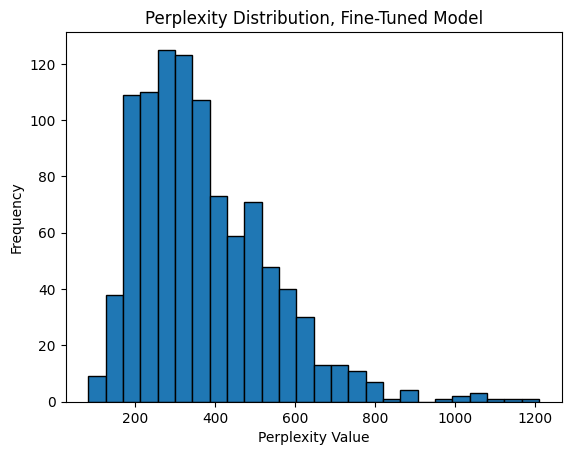

In [34]:
plt.hist(perplexity_list_ft_3, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Fine-Tuned Model')
plt.show()

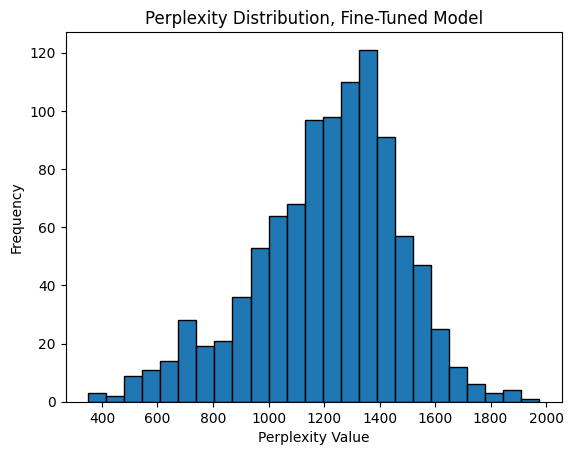

In [35]:
plt.hist(perplexity_list_base_3, bins='auto', edgecolor='black')
plt.xlabel('Perplexity Value')
plt.ylabel('Frequency')
plt.title('Perplexity Distribution, Fine-Tuned Model')
plt.show()

In [36]:
t_stat, p_value = stats.ttest_rel(perplexity_list_base_3, perplexity_list_ft_3)
print("t-statistic: {:.6f}".format(t_stat))
print("p-value: {:.12f}".format(p_value))

t-statistic: 85.624367
p-value: 0.000000000000


In [63]:
lowest_indices = []
copy = perplexity_list_ft_3
for i in range(3):
    min_value = min(copy)
    min_index = copy.index(min_value)
    lowest_indices.append(min_index)
    copy[min_index] = float('inf')
print("Indices of the Three Lowest Values:", lowest_indices)

Indices of the Three Lowest Values: [652, 296, 261]


In [59]:
lowest = []
copy = perplexity_list_ft_2
for i in range(3):
    min_value = min(copy)
    min_index = copy.index(min_value)
    lowest.append(min_index)
    copy[min_index] = float('inf')

print("Indices of the Three Lowest Values:", lowest_indices)

Indices of the Three Lowest Values: [559, 506, 890]


In [65]:
lowest_indices = []
copy = perplexity_list_ft
for i in range(3):
    min_value = min(copy)
    min_index = copy.index(min_value)
    lowest_indices.append(min_index)
    copy[min_index] = float('inf')
print("Indices of the Three Lowest Values:", lowest_indices)

Indices of the Three Lowest Values: [55, 895, 454]
